<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('F:\\data\\after_eda\\fea_sample\\storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('F:\\data\\after_eda\\fea_sample\\storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'prefer_Attach_followers', 'prefer_Attach_followees',
       'svd_dot'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

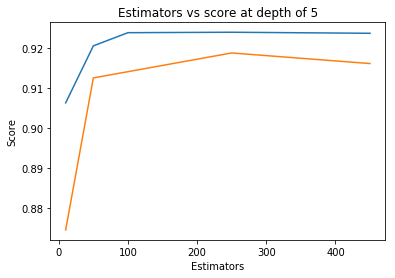

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


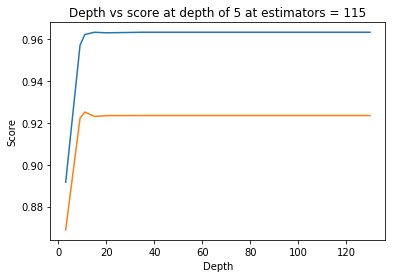

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [42]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


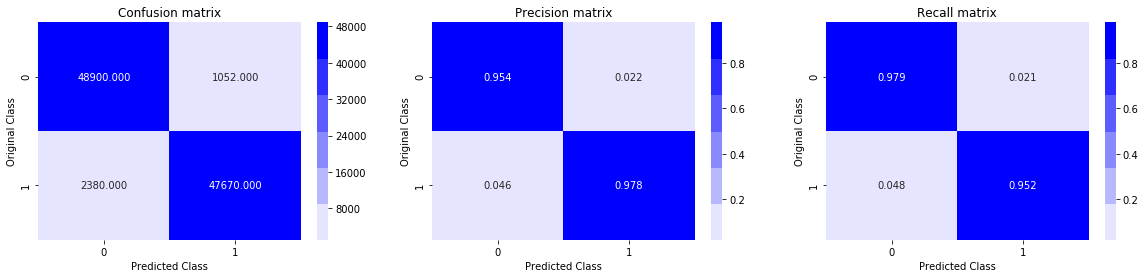

Test confusion_matrix


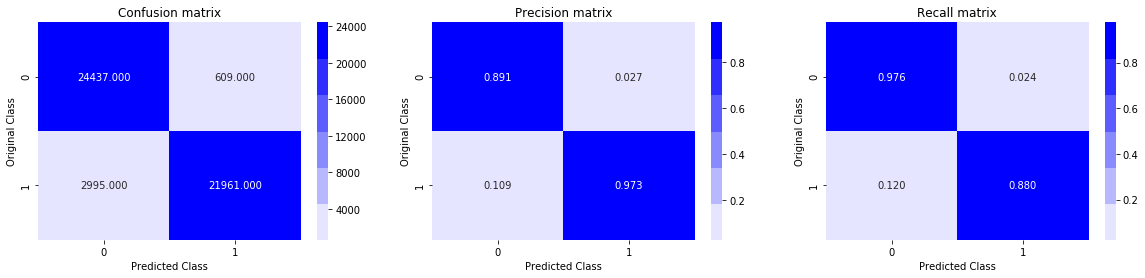

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

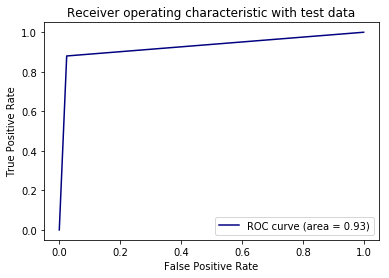

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

# Xgboost

In [7]:
estimators=[10,50,100,250,450]
depths=[3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for e in tqdm(estimators):
    for d in depths:
        model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',n_jobs=-1,max_depth=d,n_estimators=e)
        
        model.fit(df_final_train,y_train)
        train_sc = f1_score(y_train,model.predict(df_final_train))
        test_sc = f1_score(y_test,model.predict(df_final_test))
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        print('depth = ',d,'estimators=',e,'Train Score',train_sc,'test Score',test_sc)
        #print('esgtimator = ',e,'Train Score',train_sc,'test Score',test_sc)

    

  0%|                                                    | 0/5 [00:00<?, ?it/s]

depth =  3 Train Score 0.9210492696844526 test Score 0.9162413689582708
esgtimator =  10 Train Score 0.9210492696844526 test Score 0.9162413689582708
depth =  9 Train Score 0.974572231294311 test Score 0.9353873387844559
esgtimator =  10 Train Score 0.974572231294311 test Score 0.9353873387844559
depth =  11 Train Score 0.9792602484723403 test Score 0.9352584610203738
esgtimator =  10 Train Score 0.9792602484723403 test Score 0.9352584610203738
depth =  15 Train Score 0.9888520760113191 test Score 0.9339225589225589
esgtimator =  10 Train Score 0.9888520760113191 test Score 0.9339225589225589
depth =  20 Train Score 0.9943630892678035 test Score 0.9328259361268213
esgtimator =  10 Train Score 0.9943630892678035 test Score 0.9328259361268213
depth =  35 Train Score 0.9959236817066452 test Score 0.9330360898460504
esgtimator =  10 Train Score 0.9959236817066452 test Score 0.9330360898460504
depth =  50 Train Score 0.9959236817066452 test Score 0.9330360898460504
esgtimator =  10 Train Sc

 20%|████████▊                                   | 1/5 [01:28<05:54, 88.52s/it]

depth =  3 Train Score 0.9672936481408329 test Score 0.9244996199645301
esgtimator =  50 Train Score 0.9672936481408329 test Score 0.9244996199645301
depth =  9 Train Score 0.9790410391604295 test Score 0.9288137030441789
esgtimator =  50 Train Score 0.9790410391604295 test Score 0.9288137030441789
depth =  11 Train Score 0.9847264368743132 test Score 0.928930244388393
esgtimator =  50 Train Score 0.9847264368743132 test Score 0.928930244388393
depth =  15 Train Score 0.9963317831943554 test Score 0.9290024773964045
esgtimator =  50 Train Score 0.9963317831943554 test Score 0.9290024773964045
depth =  20 Train Score 0.9998701363568253 test Score 0.9298843038135325
esgtimator =  50 Train Score 0.9998701363568253 test Score 0.9298843038135325
depth =  35 Train Score 0.9999200863067886 test Score 0.9325267173963449
esgtimator =  50 Train Score 0.9999200863067886 test Score 0.9325267173963449
depth =  50 Train Score 0.9999200863067886 test Score 0.9326894690228164
esgtimator =  50 Train Sc

 40%|█████████████████▏                         | 2/5 [07:41<08:41, 173.83s/it]

depth =  3 Train Score 0.9737334885368694 test Score 0.9257938529461708
esgtimator =  100 Train Score 0.9737334885368694 test Score 0.9257938529461708
depth =  9 Train Score 0.9872623000301841 test Score 0.928066863240067
esgtimator =  100 Train Score 0.9872623000301841 test Score 0.928066863240067
depth =  11 Train Score 0.9929630484756617 test Score 0.9276714885674288
esgtimator =  100 Train Score 0.9929630484756617 test Score 0.9276714885674288
depth =  15 Train Score 0.9996302403437766 test Score 0.9281564103651554
esgtimator =  100 Train Score 0.9996302403437766 test Score 0.9281564103651554
depth =  20 Train Score 1.0 test Score 0.928606222335176
esgtimator =  100 Train Score 1.0 test Score 0.928606222335176
depth =  35 Train Score 1.0 test Score 0.9307771976918686
esgtimator =  100 Train Score 1.0 test Score 0.9307771976918686
depth =  50 Train Score 1.0 test Score 0.9308332981017207
esgtimator =  100 Train Score 1.0 test Score 0.9308332981017207
depth =  70 Train Score 1.0 test

 60%|█████████████████████████▊                 | 3/5 [19:30<11:08, 334.43s/it]

depth =  3 Train Score 0.9777854105001567 test Score 0.9003177643320419
esgtimator =  250 Train Score 0.9777854105001567 test Score 0.9003177643320419
depth =  9 Train Score 0.9996802174521325 test Score 0.925011168549365
esgtimator =  250 Train Score 0.9996802174521325 test Score 0.925011168549365
depth =  11 Train Score 1.0 test Score 0.926622066475523
esgtimator =  250 Train Score 1.0 test Score 0.926622066475523
depth =  15 Train Score 1.0 test Score 0.9275940344103358
esgtimator =  250 Train Score 1.0 test Score 0.9275940344103358
depth =  20 Train Score 1.0 test Score 0.9284533548086298
esgtimator =  250 Train Score 1.0 test Score 0.9284533548086298
depth =  35 Train Score 1.0 test Score 0.9292172182345593
esgtimator =  250 Train Score 1.0 test Score 0.9292172182345593
depth =  50 Train Score 1.0 test Score 0.9289571201694017
esgtimator =  250 Train Score 1.0 test Score 0.9289571201694017
depth =  70 Train Score 1.0 test Score 0.9289571201694017
esgtimator =  250 Train Score 1.0 

 80%|████████████████████████████████        | 4/5 [1:34:35<26:25, 1585.61s/it]

depth =  3 Train Score 0.9824140848475081 test Score 0.8959139502853021
esgtimator =  450 Train Score 0.9824140848475081 test Score 0.8959139502853021
depth =  9 Train Score 1.0 test Score 0.9250606408783353
esgtimator =  450 Train Score 1.0 test Score 0.9250606408783353
depth =  11 Train Score 1.0 test Score 0.9264696509379847
esgtimator =  450 Train Score 1.0 test Score 0.9264696509379847
depth =  15 Train Score 1.0 test Score 0.9274390373310131
esgtimator =  450 Train Score 1.0 test Score 0.9274390373310131
depth =  20 Train Score 1.0 test Score 0.9282686111582159
esgtimator =  450 Train Score 1.0 test Score 0.9282686111582159
depth =  35 Train Score 1.0 test Score 0.9289693888359283
esgtimator =  450 Train Score 1.0 test Score 0.9289693888359283
depth =  50 Train Score 1.0 test Score 0.9286955048087108
esgtimator =  450 Train Score 1.0 test Score 0.9286955048087108
depth =  70 Train Score 1.0 test Score 0.9286955048087108
esgtimator =  450 Train Score 1.0 test Score 0.9286955048087

100%|████████████████████████████████████████| 5/5 [2:31:59<00:00, 1823.98s/it]


In [15]:
opt_est=estimators[test_scores.index(max(test_scores))]
opt_dep=depths[test_scores.index(max(test_scores))]
print('optimal extimator and optimal depth are {} and {}:'.format(opt_est,opt_dep))

optimal extimator and optimal depth are 50 and 9:


In [29]:
model = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1,max_depth=50,n_estimators=9)
model.fit(df_final_train,y_train)
y_train_pred = model.predict(df_final_train)
y_test_pred = model.predict(df_final_test)
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9954817315687708
Test f1 score 0.9330081164052315


Train confusion_matrix


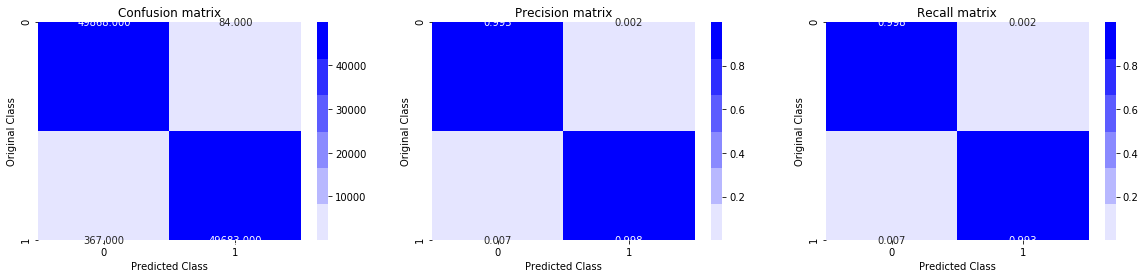

Test confusion_matrix


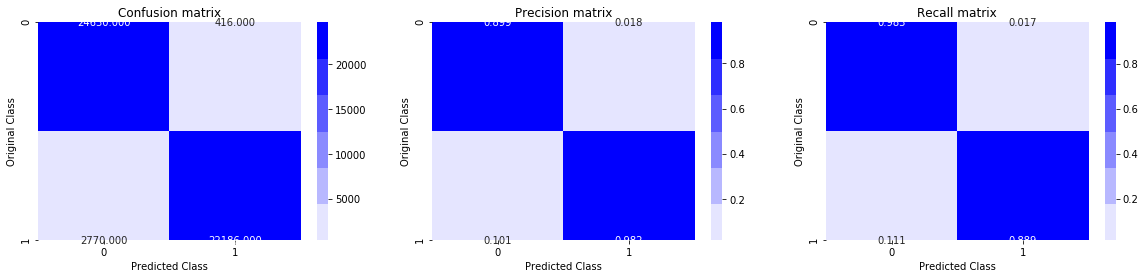

In [43]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

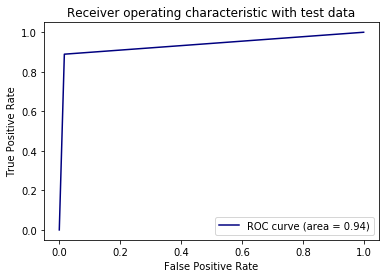

In [44]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.